50 50
50 50
50 50


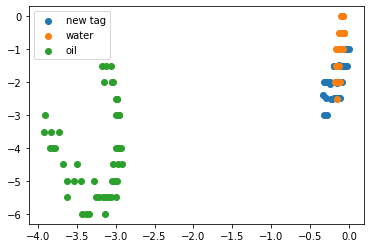

In [1]:
import glob, os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

data = {}
d_f = pd.read_csv(os.path.join(folder_clean, 'd10_watertag_f_kde.csv'))
d_t = pd.read_csv(os.path.join(folder_clean, 'd10_watertag_t_kde.csv'))
print(len(d_f), len(d_t))
plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])
data['watertag_rssi_f'] = d_f['RSSI'].values
data['watertag_rssi_t'] = d_t['RSSI'].values
data['watertag_phase_f'] = d_f['PHASE'].values
data['watertag_phase_t'] = d_t['PHASE'].values

d_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
d_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_t_kde.csv'))
print(len(d_f), len(d_t))
plt.scatter(np.unwrap(d_f['PHASE']) - np.unwrap(d_t['PHASE']), d_f['RSSI'] - d_t['RSSI'])
data['water_rssi_f'] = d_f['RSSI'].values
data['water_rssi_t'] = d_t['RSSI'].values
data['water_phase_f'] = d_f['PHASE'].values
data['water_phase_t'] = d_t['PHASE'].values

p_f = pd.read_csv(os.path.join(folder_clean, 'd1_oil_f_kde.csv'))
p_t = pd.read_csv(os.path.join(folder_clean, 'd1_oil_t_kde.csv'))
print(len(p_f), len(p_t))
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE']), p_f['RSSI'] - p_t['RSSI'])

plt.legend(['new tag', 'water', 'oil'])

import scipy.io
scipy.io.savemat('tag.mat', data)

water ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'vinegar' 'water' 'water']
Correct 0.98
-------------------------------
watertag ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'vinegar' 'water' 'water' 'water' 'vinegar' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'vinegar' 'water'
 'water' 'water' 'vinegar' 'water' 'water' 'water' 'water' 'vinegar'
 'vinegar' 'water' 'water' 'vinegar' 'vinegar' 'vinegar' 'water']
Correct 0.82
-------------------------------
90 100 0.9


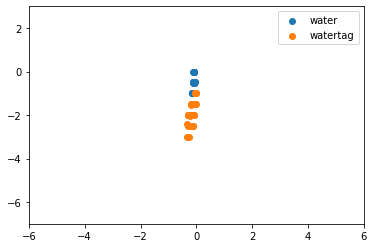

In [10]:
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_all_nopi.joblib')

cnt = 0
correctcnt = 0

matls = ['water', 'watertag']
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd10_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd10_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result=='water').sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(matls)
plt.xlim([-6, 6])
plt.ylim([-7, 3])
print(correctcnt, cnt, correctcnt/cnt)